from https://github.com/jacobgil/pytorch-grad-cam/issues/84

In [12]:
!wget https://user-images.githubusercontent.com/39136064/117029624-76473600-ad1c-11eb-95ba-35cc554214d3.jpg

--2022-06-26 18:53:57--  https://user-images.githubusercontent.com/39136064/117029624-76473600-ad1c-11eb-95ba-35cc554214d3.jpg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13804 (13K) [image/jpeg]
Saving to: ‘117029624-76473600-ad1c-11eb-95ba-35cc554214d3.jpg’

117029624-76473600- 100%[===================>]  13.48K  --.-KB/s    in 0.001s  

2022-06-26 18:53:57 (19.4 MB/s) - ‘117029624-76473600-ad1c-11eb-95ba-35cc554214d3.jpg’ saved [13804/13804]



In [5]:
!pip install timm
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 47.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.9-py3-none-any.whl size=25964 sha256=bf89854b3939e4c9aa5d9ca71c4969bd7538b2dd770d26a6306e59ad83031ec8
  Stored in directory: /root/.cache/pip/wheels/65/e8/6e/6eedfbe3f0007dfd8116e6820b69691c4103d89ad2ae8c69ff
Successfully built grad-cam


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from timm.models import swin_base_patch4_window7_224_in22k
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

In [ ]:
# for SWIN
def reshape_transform(tensor, height=7, width=7):
    result = tensor.reshape(tensor.size(0), 
        height, width, tensor.size(2))
    result = result.transpose(2, 3).transpose(1, 2)
    return result

In [20]:
def reshape_transform(tensor, height=6, width=8):
    result = tensor[:, 1 :  , :].reshape(tensor.size(0), 
        height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result
model = swin_base_patch4_window7_224_in22k(pretrained=True,num_classes = 5)
model.cuda()
target_layers = [model.layers[-1].blocks[-1]]
cam = GradCAMPlusPlus(model=model, 
                      target_layers=target_layers, 
                      reshape_transform=reshape_transform)

img_path = '117029624-76473600-ad1c-11eb-95ba-35cc554214d3.jpg'
rgb_img = cv2.imread(img_path, 1)[:, :, ::-1]
rgb_img = cv2.resize(rgb_img, (224, 224))
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5], 
                                          std=[0.5, 0.5, 0.5]).cuda()
grayscale_cam = cam(input_tensor=input_tensor,
#                     target_category=0,
                    eigen_smooth=True,
                    aug_smooth=True)

grayscale_cam = grayscale_cam[0, :]
cam_image = show_cam_on_image(rgb_img, grayscale_cam)
cv2.imwrite('save_path.jpg', cam_image)

True

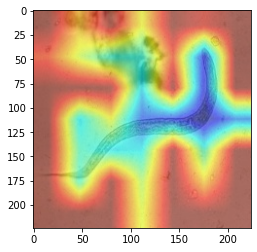

In [21]:
cv2.imread('./save_path.jpg')